Mean Squared Error (MSE): 0.003661411709118907
R-squared (R2 Score): 0.8209578626347723
Coeficientes del modelo:
GRE Score: 0.0022751474276804704
TOEFL Score: 0.0029355495750992486
University Rating: 0.0024116157152525805
SOP: 0.0019086330178051591
LOR: 0.01683118913037471
CGPA: 0.11612460635969506
Research: 0.02606229515106145


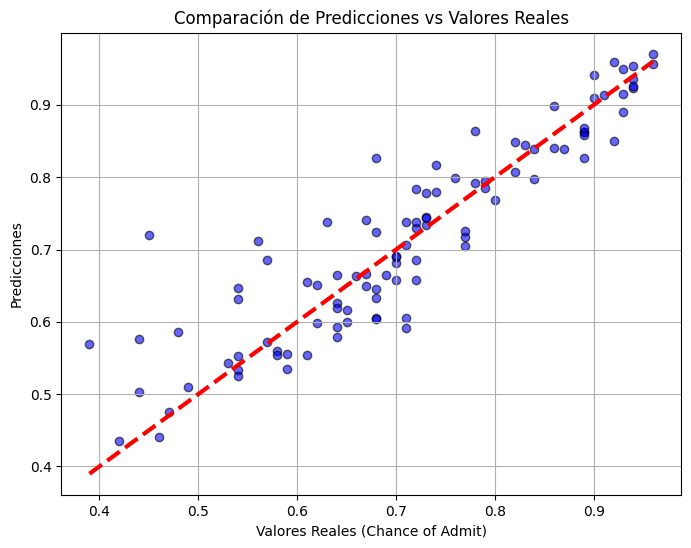

In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
url = 'https://raw.githubusercontent.com/bhabani24/Linear-Regression-datasets/main/Admission_Prediction.csv'
data = pd.read_csv(url)

# Eliminar la columna 'Serial No.' ya que no es relevante para el análisis
data = data.drop('Serial No.', axis=1)

# Manejo de valores NaN: Rellenar los valores nulos con la media de cada columna
data.fillna(data.mean(), inplace=True)

# Definir las variables independientes (X) y la variable dependiente (y)
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y = data['Chance of Admit']

# Dividir el dataset en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Regresión Lineal Múltiple
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

# Coeficientes de regresión
print("Coeficientes del modelo:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef}")

# Crear una gráfica para comparar valores reales vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)  # Línea de igualdad
plt.xlabel("Valores Reales (Chance of Admit)")
plt.ylabel("Predicciones")
plt.title("Comparación de Predicciones vs Valores Reales")
plt.grid(True)
plt.show()
